In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import sys
import cmocean
from scipy.stats import linregress
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy import interpolate
from numba import autojit
from pylab import *
from matplotlib import gridspec
import netCDF4
sys.path.append('/noc/users/hb1g13/Python/python_functions/')
from useful import *
from Flat_channel import *
from HB_Plot import nf, fmt
import SG as SG
import layers_calc
sys.path.append('/noc/users/hb1g13/Python/python_functions/MITgcmUtils/')
import utils
%matplotlib inline

In [4]:
# Some parameters
tau = ['3','Closed']
Figletter = ['a) ', 'b) ', 'c) ', 'd) ', 'e) ', 'f) ', 'g) ', 'h) ', 'j) ']
# Path root
x = '/noc/msm/scratch/students/hb1g13/Mobilis'
# Now Make file structure
check = 0
runs = []
for i in range(len(tau)):
    flist = x+'/'+str(tau[i])+'daynokpp/PSI.nc'
    if not os.path.exists(flist):
        print ' WARNING: '+flist+' does not exist! (skipping this tau...)'
        check += 0
    else:
        check += 1
        runs.append(i)
Runs = np.array(runs)

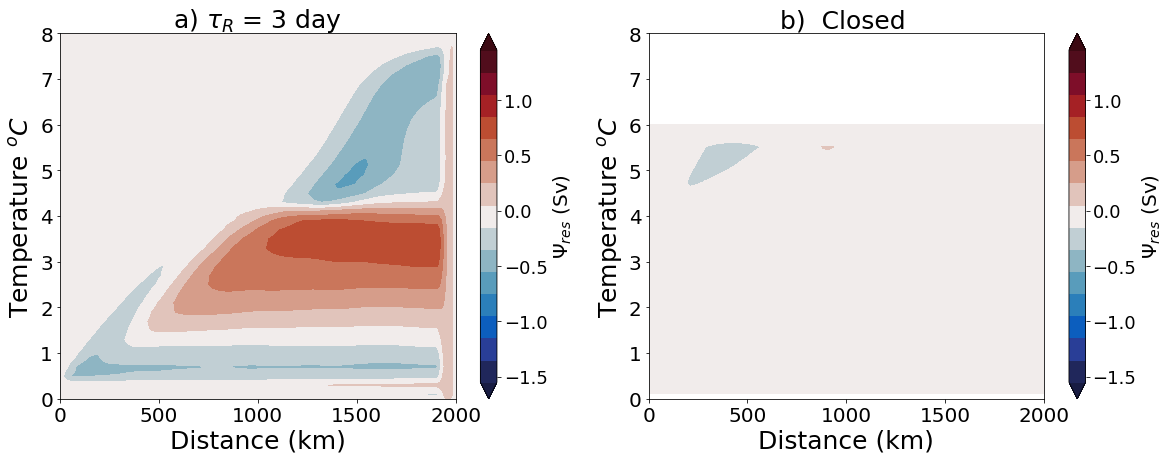

In [9]:
fig = plt.figure(figsize=(16.5, 6.5))
Psi_levs = np.arange(-1.6, 1.6, .2)+0.05
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = np.arange(-0., 8., 1)
for i in range(len(Runs)):
    #i =2 
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    psi = c.get_psi_iso()/10**6
    y = c.yg/1000
    g = layers_calc.LayersComputer(c)
    rho = g.glvl
    if i==1:
        rho =rho*0.6
    psi[-2,:]=0
    scale =1
 
    ax = fig.add_subplot(1, 2, i+1)
    p = ax.contourf(y,rho[~isnan(rho)],psi,Psi_levs*scale,cmap=cmocean.cm.balance,extend='both') 
    plt.ylim((0,8))
    Psi = c.get_psi_iso_z()/10**6
    #cbar = fig.colorbar(p, cax=ax, ticks=Psi_ticks*scale)
    cbar = fig.colorbar(p, ax=ax,ticks=Psi_ticks*scale)
    cbar.ax.tick_params(labelsize=18)
    cbar.ax.set_ylabel(r'$\Psi  _{res} $ (Sv)', fontsize=20, )
    
    if str(Figletter[i])=='a) ':
        ax.set_title(str(Figletter[i])+r'$\tau _{R}$ = 3 day ', fontsize=25)
    elif str(Figletter[i])=='b) ':
        ax.set_title(str(Figletter[i])+r' Closed ', fontsize=25)
        

    ax.set_xlabel('Distance (km)', fontsize=25)
    ax.set_ylabel('Temperature $^o C$', fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()

In [2]:
# Some parameters
tau = ['3','300','3000','Closed']
Figletter = ['a) ', 'b) ', 'c) ', 'd) ', 'e) ', 'f) ', 'g) ', 'h) ', 'j) ']
# Path root
x = '/noc/msm/scratch/students/hb1g13/Mobilis'
# Now Make file structure
check = 0
runs = []
for i in range(len(tau)):
    flist = x+'/'+str(tau[i])+'daynokpp/PSI.nc'
    if not os.path.exists(flist):
        print ' WARNING: '+flist+' does not exist! (skipping this tau...)'
        check += 0
    else:
        check += 1
        runs.append(i)
Runs = np.array(runs)

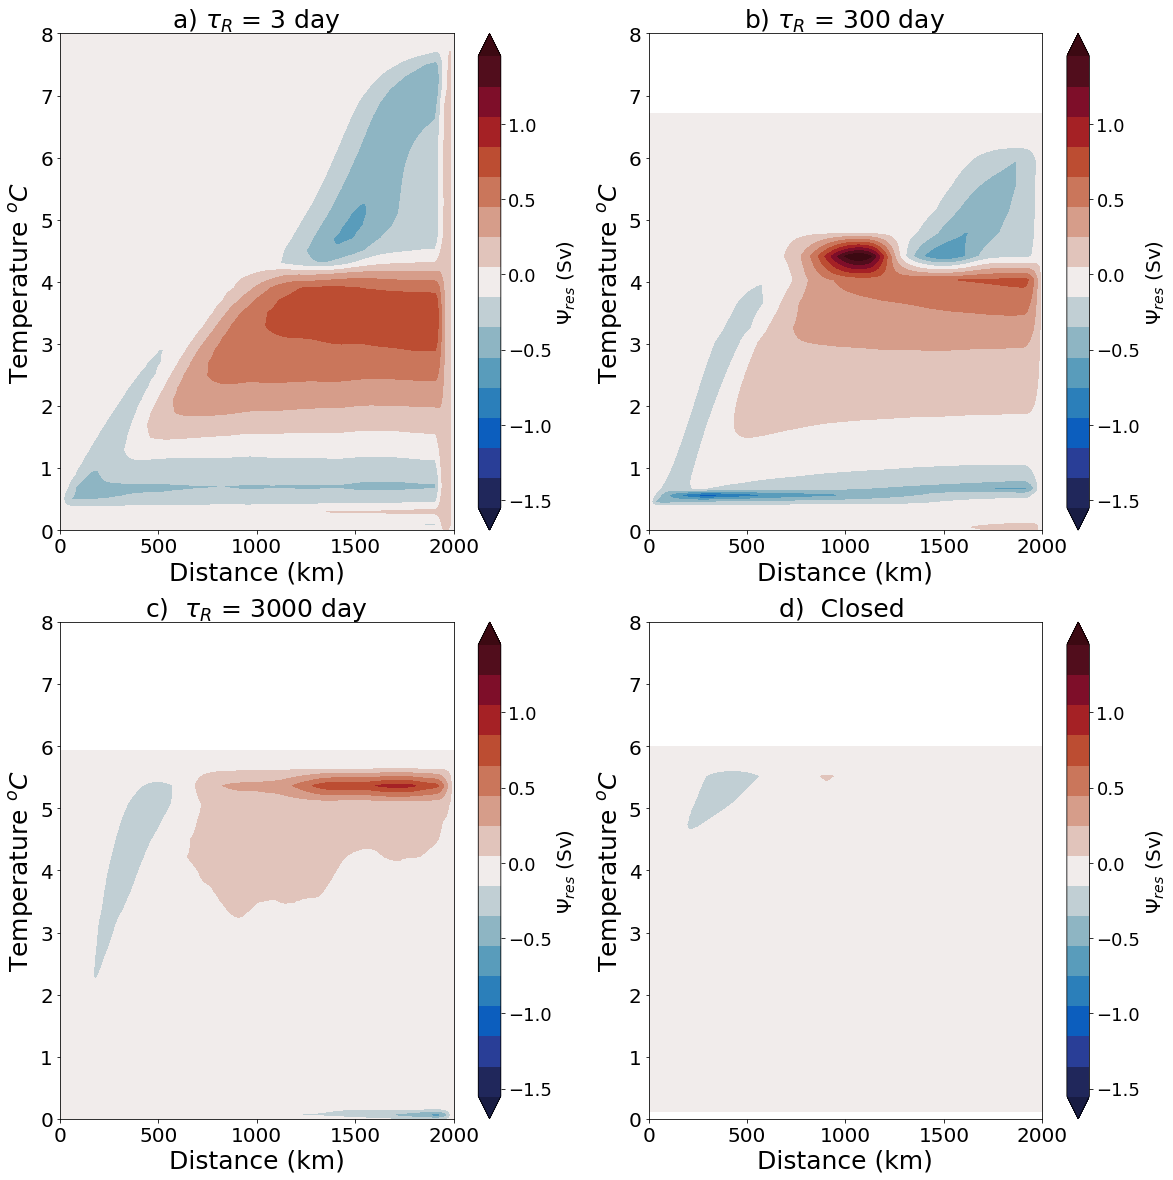

In [34]:
fig = plt.figure(figsize=(16.5, 16.5))
Psi_levs = np.arange(-1.6, 1.6, .2)+0.05
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = np.arange(-0., 8., 1)
for i in range(len(Runs)):
    #i =2 
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    psi = c.get_psi_iso()/10**6
    y = c.yg/1000
    g = layers_calc.LayersComputer(c)
    rho = g.glvl
    if i==3:
        rho =rho*0.6
    psi[-2,:]=0
    scale =1
 
    ax = fig.add_subplot(2, 2, i+1)
    p = ax.contourf(y,rho[~isnan(rho)],psi,Psi_levs*scale,cmap=cmocean.cm.balance,extend='both') 
    plt.ylim((0,8))
    Psi = c.get_psi_iso_z()/10**6

    #cbar = fig.colorbar(p, cax=ax, ticks=Psi_ticks*scale)
    cbar = fig.colorbar(p, ax=ax,ticks=Psi_ticks*scale)
    cbar.ax.tick_params(labelsize=18)
    cbar.ax.set_ylabel(r'$\Psi  _{res} $ (Sv)', fontsize=20, )
    
    if str(Figletter[i])=='a) ':
        ax.set_title(str(Figletter[i])+r'$\tau _{R}$ = 3 day ', fontsize=25)
    elif str(Figletter[i])=='b) ':
        ax.set_title(str(Figletter[i])+r'$\tau _{R}$ = 300 day ', fontsize=25)
    elif str(Figletter[i])=='c) ':
        ax.set_title(str(Figletter[i])+r' $\tau _{R}$ = 3000 day ', fontsize=25)
    elif str(Figletter[i])=='d) ':
        ax.set_title(str(Figletter[i])+r' Closed ', fontsize=25)
        

    ax.set_xlabel('Distance (km)', fontsize=25)
    ax.set_ylabel('Temperature $^o C$', fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()

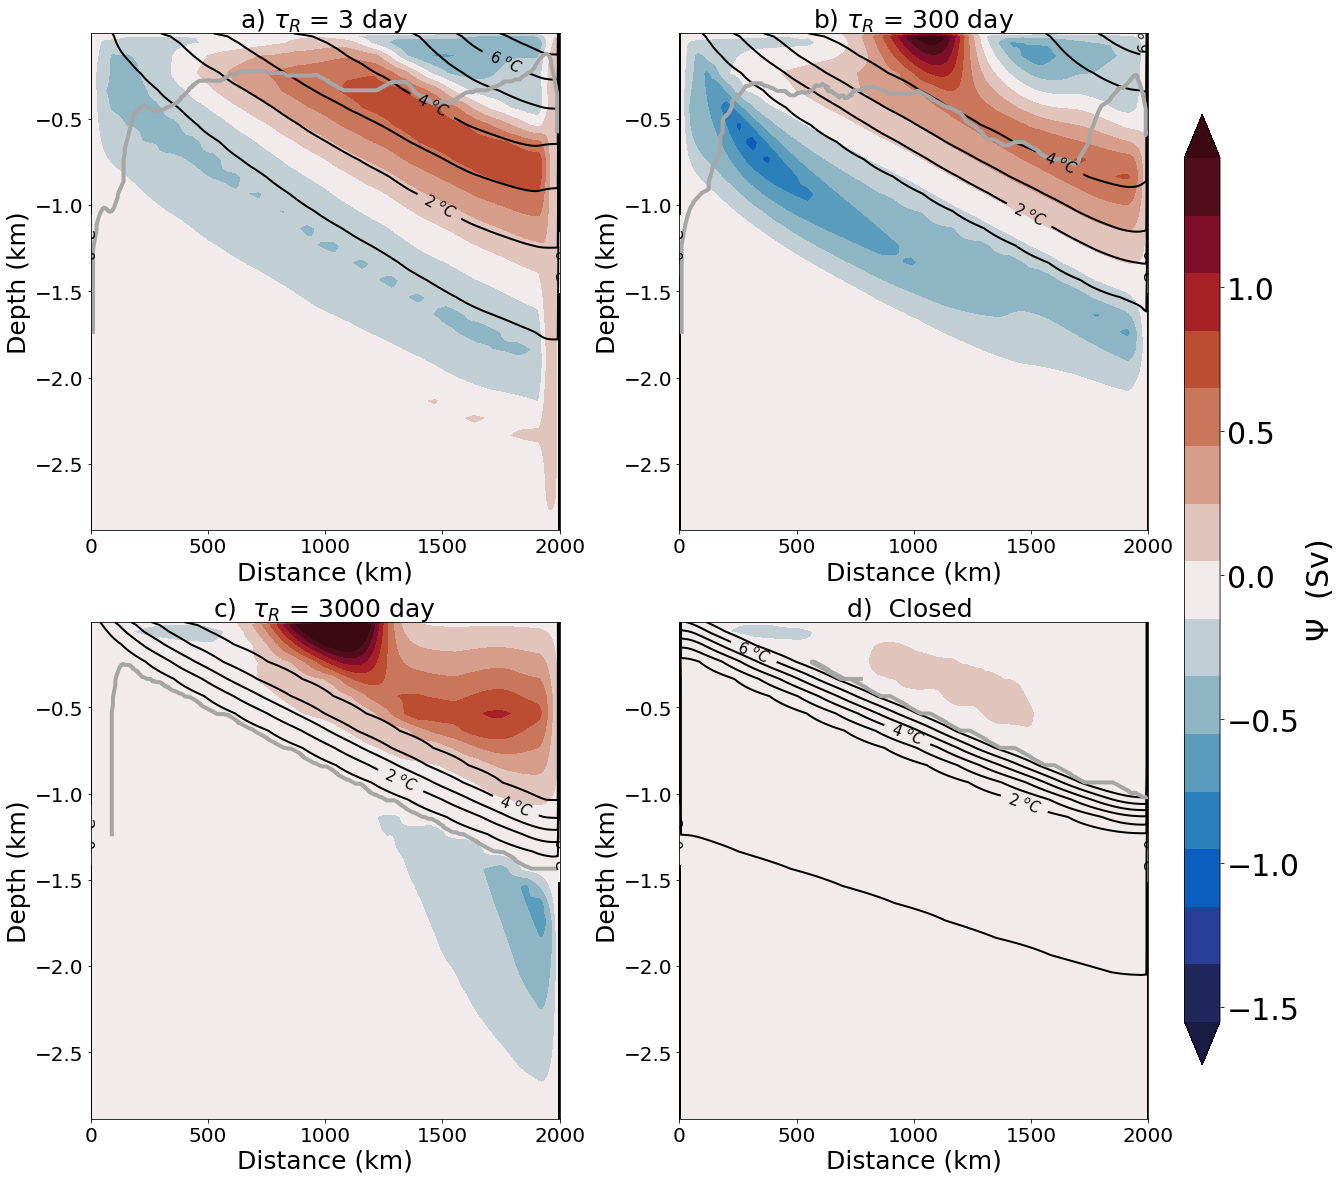

In [21]:
# Create Panels
fig = plt.figure(figsize=(16.5, 16.5))
Psi_levs = np.arange(-1.6, 1.6, .2)+0.05
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = np.arange(-0., 8., 1)

for i in range(len(Runs)):

    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS

    Psi = c.get_psi_iso_z()/10**6
    Psi[-1,:]=0
    g = layers_calc.LayersComputer(c)
    PI = c.mnc('PSI.nc',"LaPs1TH").mean(axis=2)
    th = c.mnc('PSI.nc',"LaHs1TH").mean(axis=2)
    PIz = g.transform_g_to_z(PI,th)
    #PIz[-5::,50::]=np.nan
    ax = fig.add_subplot(2, 2, i+1)
    p = ax.contourf(c.yc/1000, c.zc/1000,
                Psi, Psi_levs, cmap=cmocean.cm.balance, extend='both')
    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=15)
    # Plot mixed layer depth via layer probability
   
    g = layers_calc.LayersComputer(c)
    PI = c.mnc('PSI.nc', "LaPs1TH").mean(axis=2)
    th = c.mnc('PSI.nc', "LaHs1TH").mean(axis=2)
    PIz = g.transform_g_to_z(PI, th)
    # Remove some nonsense
    PIz[-5::, 5::] = np.nan
    P = 0.99999999999
    r = ax.contour(c.yg/1000, c.zc/1000, PIz[:,:], [P],
                   colors='0.75', linewidths=3)
    # Extract the contour data 
    dat0 = r.allsegs[0][0]
    
    # Plot nice thick smoothed line!
    s = ax.plot(dat0[10:-10,0],SG.savitzky_golay(dat0[10:-10,1],27,1),color='0.65', linewidth=4)
    # Remove the messy countour
    ax.collections.pop(-1)
    
    
    if str(Figletter[i])=='a) ':
        ax.set_title(str(Figletter[i])+r'$\tau _{R}$ = 3 day ', fontsize=25)
    elif str(Figletter[i])=='b) ':
        ax.set_title(str(Figletter[i])+r'$\tau _{R}$ = 300 day ', fontsize=25)
    elif str(Figletter[i])=='c) ':
        ax.set_title(str(Figletter[i])+r' $\tau _{R}$ = 3000 day ', fontsize=25)
    elif str(Figletter[i])=='d) ':
        ax.set_title(str(Figletter[i])+r' Closed ', fontsize=25)
    


    ax.set_xlabel('Distance (km)', fontsize=25)
    ax.set_ylabel('Depth (km)', fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax, ticks=Psi_ticks)
cbar.ax.set_ylabel('$\Psi$  (Sv)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

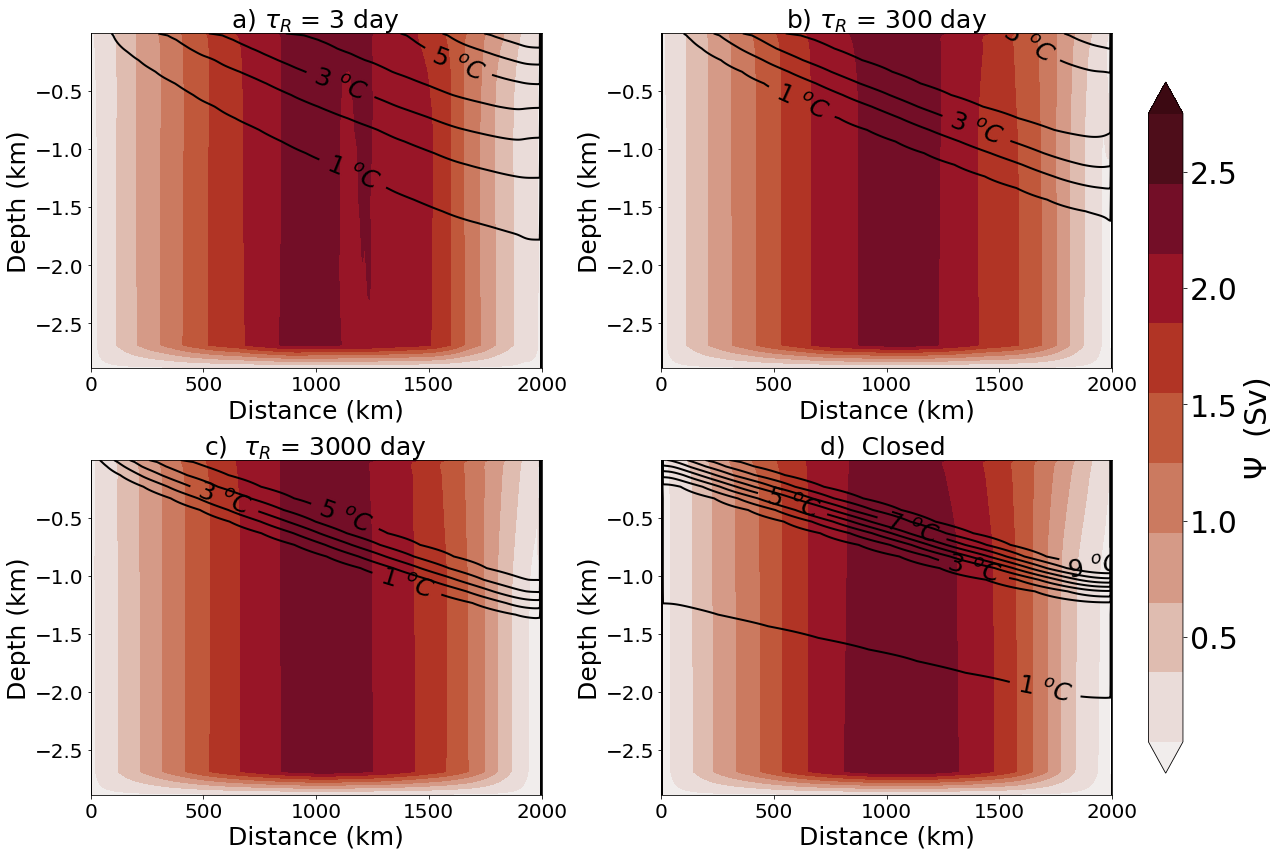

In [22]:
fig = plt.figure(figsize=(16.0, 12.))
# Create Panels
Psi_levs = np.arange(0.05, 2.8, .3)
Psi_ticks =np.arange(0, 3., .5)

Q_levs = arange(-1,8,1),arange(-1,8,1),arange(-1,8,1),arange(-1,10,1)

for i in range(len(Runs)):
    
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    psi = c.get_psi_bar()/10**6
    psi[-1]=0
    Tavlat = c.mnc('Tav.nc','THETA').mean(axis=2)
    y = c.yc/1000
    yp = c.yg/1000
    ax = fig.add_subplot(2, 2, i+1)
    p = ax.contourf(yp, c.zc/1000, psi, Psi_levs,
                    cmap=cmocean.cm.amp,extend='both')
    Q2_levs = (np.arange(-1, 8, 1))
    Tavlat = c.get_zonal_avg('Tav.nc','THETA')
    q = ax.contour(y, c.zc/1000,
                   Tavlat, Q_levs[i], colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=20)

    if str(Figletter[i])=='a) ':
        ax.set_title(str(Figletter[i])+r'$\tau _{R}$ = 3 day ', fontsize=25)
    elif str(Figletter[i])=='b) ':
        ax.set_title(str(Figletter[i])+r'$\tau _{R}$ = 300 day ', fontsize=25)
    elif str(Figletter[i])=='c) ':
        ax.set_title(str(Figletter[i])+r' $\tau _{R}$ = 3000 day ', fontsize=25)
    elif str(Figletter[i])=='d) ':
        ax.set_title(str(Figletter[i])+r' Closed ', fontsize=25)
    ax.set_xlabel('Distance (km)', fontsize=25)
    ax.set_ylabel('Depth (km)', fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax, ticks=Psi_ticks)
cbar.ax.set_ylabel('$\Psi$  (Sv)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

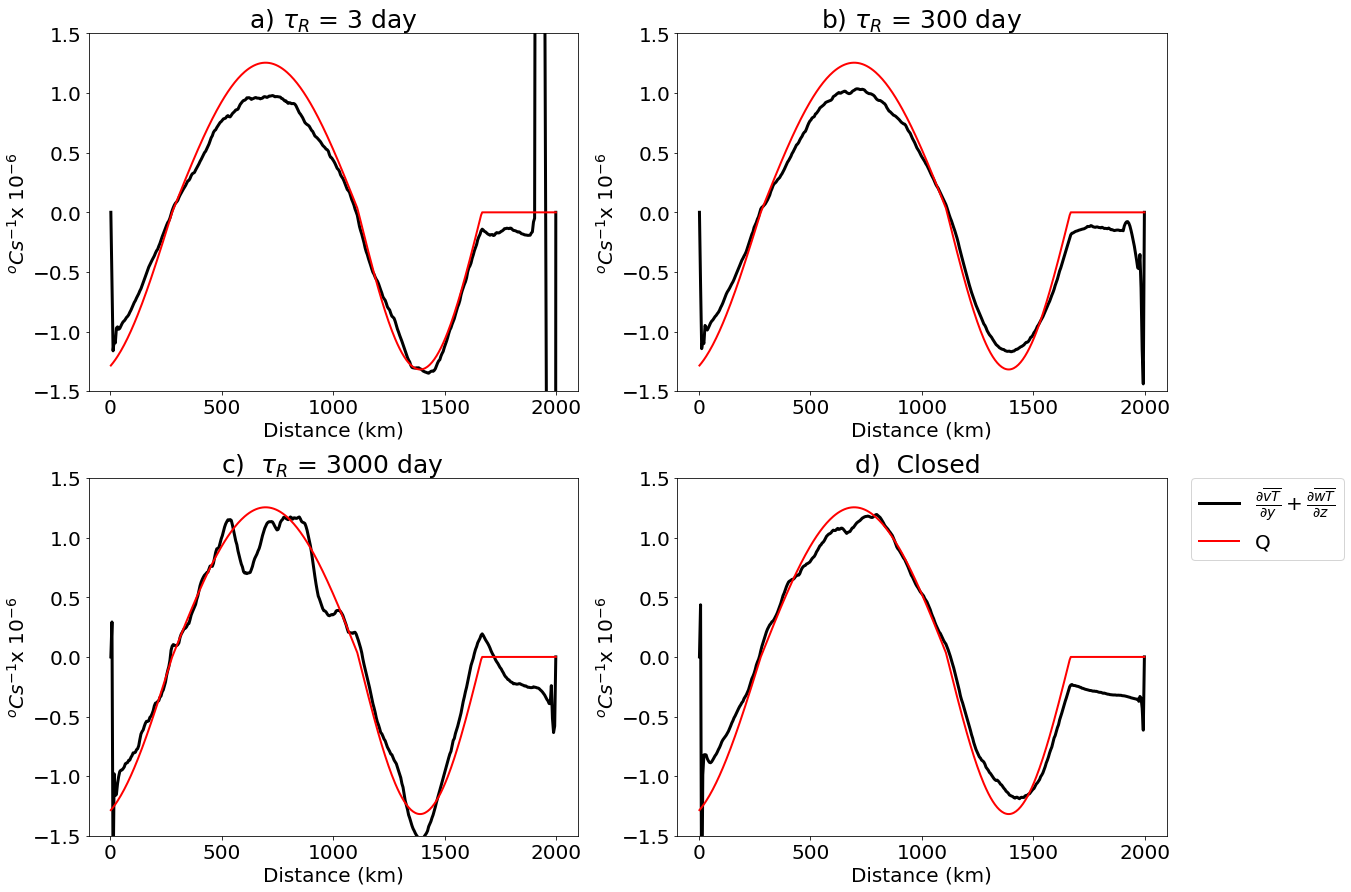

In [26]:
fig = plt.figure(figsize=(16.5, 12.5))
# Create Panels

Psi_levs = np.arange(-2., 2., .25)+0.05
Psi_ticks =np.arange(-2., 2., .5)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
     # PLOT PANNELS
    CellVol = c.rac*tile(c.dzf,(c.Nx,c.Ny,1)).T
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar         
    # put everything on the C Grid                    
    VT = (c.mnc('Tav_VT.nc','VVELTH'))
    WT = (c.mnc('Tav_VT.nc','WVELTH'))
    # Vertical Mass-Weight Transp of Pot Temp (K.m/s)
    WTHMASS = c.mnc('SURF.nc', 'WTHMASS')
    # Surface cor
    Surcor = (WTHMASS.mean(axis=0)).mean(axis=1)
    dVT = (VT[:,0:-1,:]-VT[:,1::,:])*CellVol
    dWT = (WT[1::,:,:]-WT[0:-1,:,:])*CellVol[0:-1,:,:]
    Adv = (dVT.sum(axis=0) + dWT.sum(axis=0))/sum(CellVol)
    Diff = -(5000*(dVT.sum(axis=0) + dWT.sum(axis=0))/sum(CellVol)).mean(axis=1)
    Q = c.mnc('SURF.nc', 'TFLUX').mean(axis=0).mean(axis=1)
    Psipred = (Q)/(1000*3985)
    ax = fig.add_subplot(2, 2, i+1)
    p = ax.plot(c.yc/1000,(Diff+Surcor)*(1000*3985),'k',linewidth=3)
    p = ax.plot(c.yc/1000,(Psipred/2)*10**6,'r',linewidth=2)
    ax.set_ylim(-1.5,1.5)
    
    if str(Figletter[i])=='a) ':
        ax.set_title(str(Figletter[i])+r'$\tau _{R}$ = 3 day ', fontsize=25)
    elif str(Figletter[i])=='b) ':
        ax.set_title(str(Figletter[i])+r'$\tau _{R}$ = 300 day ', fontsize=25)
    elif str(Figletter[i])=='c) ':
        ax.set_title(str(Figletter[i])+r' $\tau _{R}$ = 3000 day ', fontsize=25)
    elif str(Figletter[i])=='d) ':
        ax.set_title(str(Figletter[i])+r' Closed ', fontsize=25)
    ax.set_xlabel('Distance (km)', fontsize=20)
    ax.set_ylabel(r'$^oCs^{-1}$x $10^{-6}$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)

lgd=plt.legend([r'$\frac{\partial  \overline{vT}}{\partial y} + \frac{\partial  \overline{wT}}{\partial z}$',
                'Q'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)
plt.tight_layout()

/noc/users/hb1g13/.conda/envs/CentOS/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in divide
/noc/users/hb1g13/.conda/envs/CentOS/lib/python2.7/site-packages/ipykernel/__main__.py:43: RuntimeWarning: invalid value encountered in greater
/noc/users/hb1g13/.conda/envs/CentOS/lib/python2.7/site-packages/ipykernel/__main__.py:44: RuntimeWarning: invalid value encountered in less
/noc/users/hb1g13/.conda/envs/CentOS/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in divide


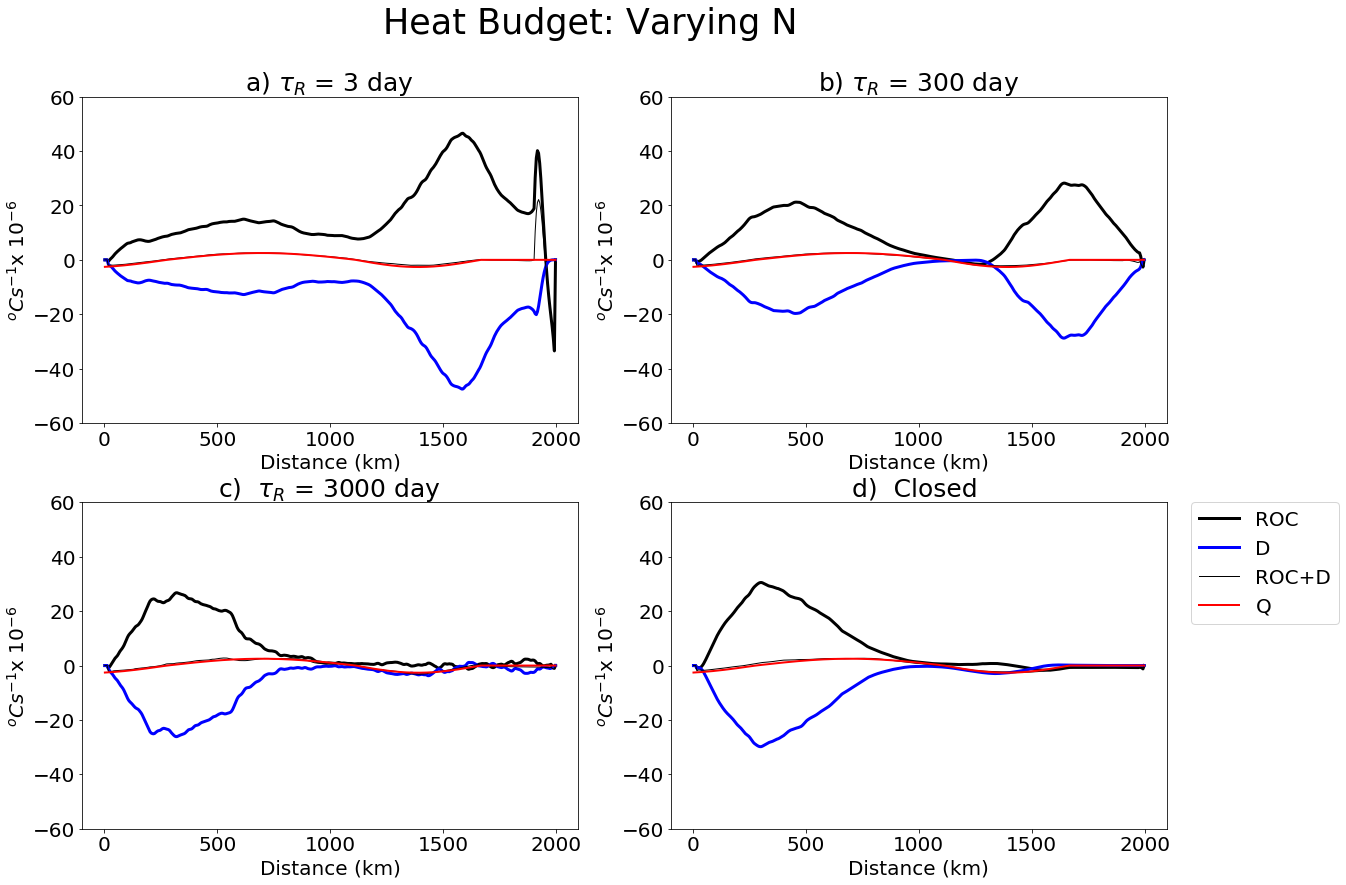

In [29]:
fig = plt.figure(figsize=(16.5, 12.5))
# Create Panels

Psi_levs = np.arange(-2., 2., .25)+0.05
Psi_ticks =np.arange(-2., 2., .5)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    ax = fig.add_subplot(2, 2, i+1)
    nopart = c. HFacC
    nopart[nopart<1] = 0
    CellVol = c.rac*tile(c.dzf,(c.Nx,c.Ny,1)).T*nopart

    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar    
    # put everything on the C Grid                        
    VT = (c.mnc('Tav_VT.nc','VVELTH'))
    WT = (c.mnc('Tav_VT.nc','WVELTH'))
    Tv = utils.cgrid_to_vgrid(c.mnc('Tav.nc','THETA'))
    Tw = utils.cgrid_to_wgrid(c.mnc('Tav.nc','THETA'))
    V = (c.mnc('Tav.nc','VVEL'))
    W = (c.mnc('Tav.nc','WVEL'))
    npad = ((0, 1), (0, 0), (0, 0))
    W = np.pad(W, pad_width=npad, mode='constant', constant_values=0)
    WT = np.pad(WT, pad_width=npad, mode='constant', constant_values=0)
    VTbar = V*Tv
    WTbar = W*Tw
    VpTp = VT - VTbar
    WpTp = WT - WTbar
    # Vertical Mass-Weight Transp of Pot Temp (K.m/s)
    WTHMASS = c.mnc('SURF.nc', 'WTHMASS')
    # Surface cor
    Surcor = (WTHMASS.mean(axis=0)).mean(axis=1)
    dVTbar = (VTbar[:,0:-1,:] - VTbar[:,1::,:])*CellVol
    dWTbar = (WTbar[1::,:,:] - WTbar[0:-1,:,:])*CellVol
    dVTe = (VpTp[:,0:-1,:] - VpTp[:,1::,:])*CellVol
    dWTe = (WpTp[1::,:,:] - WpTp[0:-1,:,:])*CellVol
    Ty = (Tv[:,0:-1,:] - Tv[:,1::,:])*CellVol
    Tz = (Tw[1::,:,:] - Tw[0:-1,:,:])*CellVol
    Sp = zeros((c.Nz,c.Ny,c.Nx))
    Sp = -Ty/Tz
    #Sp[abs(Sp)<10**-6]=10**-6
    Sp[Sp>1]=1
    Sp[Sp<-1]=-1
    Sp[isinf(Sp)]=10**-6
    Sp[isnan(Sp)]=10**-6
    Ade = ((c.vgrid_to_cgrid(VpTp)*Sp)[1::,:,:] 
           - (c.vgrid_to_cgrid(VpTp)*Sp)[0:-1,:,:])*CellVol[0:-1,:,:] 
    DE = ((c.wgrid_to_cgrid(WpTp)-(c.vgrid_to_cgrid(VpTp)*Sp))[1::,:,:] 
          - (c.wgrid_to_cgrid(WpTp)-(c.vgrid_to_cgrid(VpTp)*Sp))[0:-1,:,:])*CellVol[0:-1,:,:] 
    # Surface cor
    # Surf_corr_tend = (- WTHMASS(ix,iy)) / (DRF(1) * hFacC(ix,iy,1)
    Surcor = -(WTHMASS.mean(axis=0)).mean(axis=1)*c.dzf[0]
    npad = ((0, 1), (0, 0), (0, 0))
    DE = np.pad(DE, pad_width=npad, mode='constant', constant_values=0)

    ROC = -((np.nansum(Ade,axis=0) + dVTe.sum(axis=0) + dVTbar.sum(axis=0) + dWTbar.sum(axis=0)).sum(axis=1))/sum(CellVol.mean(axis=2))
 
    D = -((((DE )).sum(axis=2)).sum(axis=0))/sum(CellVol.mean(axis=2))
    # Tidy for boundary conditions
    ROC[0:3] = 0
    D[0:3] = 0
    # Surface Heat Flux in W/m**2
    Q = c.mnc('SURF.nc', 'TFLUX').mean(axis=0).mean(axis=1)

    Psipred = (Q)/(1000*3985)
    p = plt.plot(c.yc/1000,(ROC)*10**6,'k',linewidth=3)
    p = plt.plot(c.yc/1000,(D)*10**6,'b',linewidth=3)
    p = plt.plot(c.yc/1000,(ROC+D+Surcor)*10**6,'k',linewidth=1)
    p = plt.plot(c.yc/1000,Psipred*10**6,'r',linewidth=2)
    plt.ylim(-60,60)
    
    if str(Figletter[i])=='a) ':
        ax.set_title(str(Figletter[i])+r'$\tau _{R}$ = 3 day ', fontsize=25)
    elif str(Figletter[i])=='b) ':
        ax.set_title(str(Figletter[i])+r'$\tau _{R}$ = 300 day ', fontsize=25)
    elif str(Figletter[i])=='c) ':
        ax.set_title(str(Figletter[i])+r' $\tau _{R}$ = 3000 day ', fontsize=25)
    elif str(Figletter[i])=='d) ':
        ax.set_title(str(Figletter[i])+r' Closed ', fontsize=25)
    ax.set_xlabel('Distance (km)', fontsize=20)
    ax.set_ylabel(r'$^oCs^{-1}$x $10^{-6}$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
lgd=plt.legend([r'ROC','D','ROC+D',
                'Q'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)
fig.suptitle('Heat Budget: Varying N',fontsize=35)
fig.subplots_adjust(top=0.88)


/noc/users/hb1g13/.conda/envs/CentOS/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in divide
/noc/users/hb1g13/.conda/envs/CentOS/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in greater
/noc/users/hb1g13/.conda/envs/CentOS/lib/python2.7/site-packages/ipykernel/__main__.py:43: RuntimeWarning: invalid value encountered in less
/noc/users/hb1g13/.conda/envs/CentOS/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: divide by zero encountered in divide


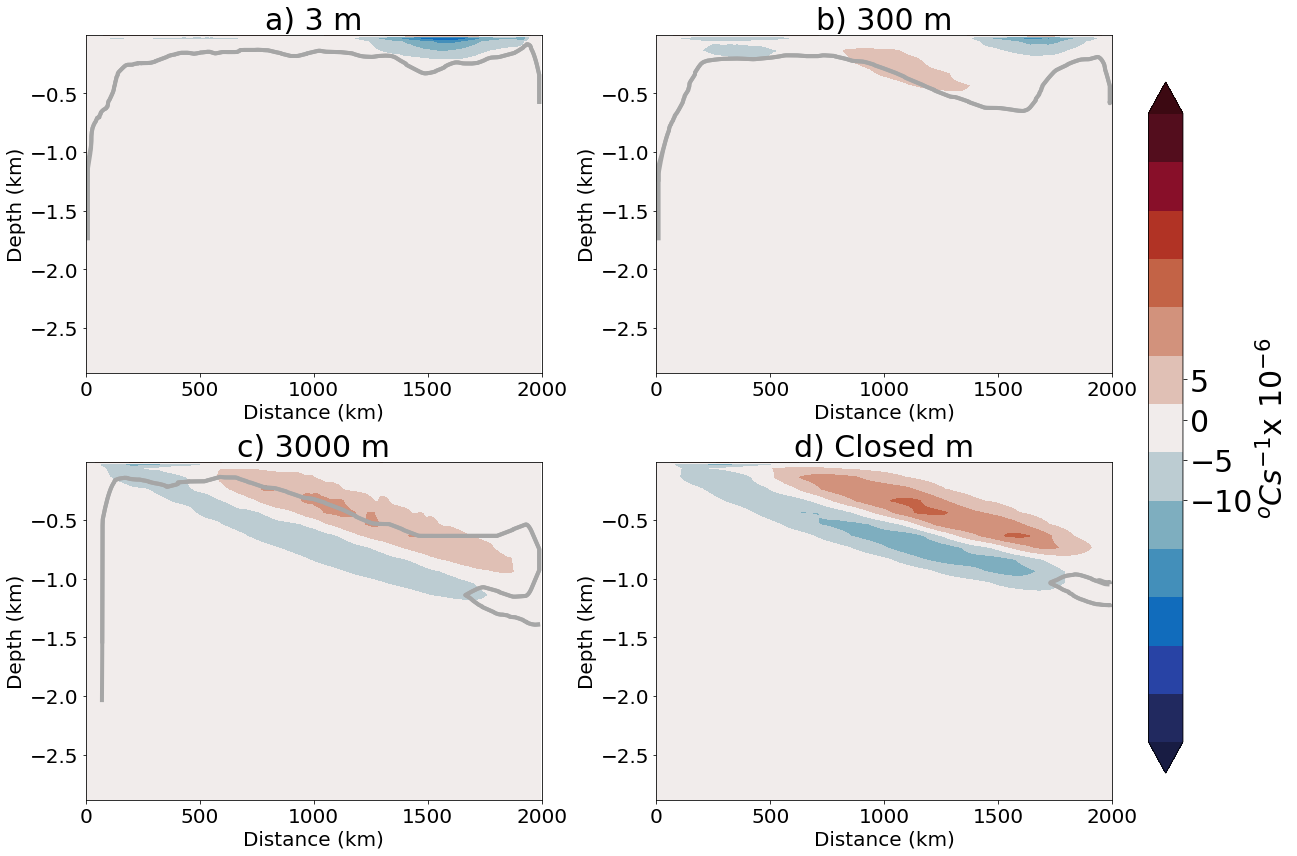

In [31]:
Psi_levs = np.arange(-2.5, 2.5, .2)+0.05
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = np.arange(-0., 8., 1)
fig = plt.figure(figsize=(16.0, 12.))
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    ax = fig.add_subplot(2, 2, i+1)
    nopart = c. HFacC
    nopart[nopart<1] = 0
    CellVol = c.rac*tile(c.dzf,(c.Nx,c.Ny,1)).T*nopart

    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar    
    # put everything on the C Grid                        
    VT = (c.mnc('Tav_VT.nc','VVELTH'))
    WT = (c.mnc('Tav_VT.nc','WVELTH'))
    Tv = utils.cgrid_to_vgrid(c.mnc('Tav.nc','THETA'))
    Tw = utils.cgrid_to_wgrid(c.mnc('Tav.nc','THETA'))
    V = (c.mnc('Tav.nc','VVEL'))
    W = (c.mnc('Tav.nc','WVEL'))
    npad = ((0, 1), (0, 0), (0, 0))
    W = np.pad(W, pad_width=npad, mode='constant', constant_values=0)
    WT = np.pad(WT, pad_width=npad, mode='constant', constant_values=0)
    VTbar = V*Tv
    WTbar = W*Tw
    VpTp = VT - VTbar
    WpTp = WT - WTbar
    # Vertical Mass-Weight Transp of Pot Temp (K.m/s)
    #THMASS = c.mnc('SURF.nc', 'WTHMASS')
    # Surface cor
    Surcor = (WTHMASS.mean(axis=0)).mean(axis=1)
    dVTbar = (VTbar[:,0:-1,:] - VTbar[:,1::,:])*CellVol
    dWTbar = (WTbar[1::,:,:] - WTbar[0:-1,:,:])*CellVol
    dVTe = (VpTp[:,0:-1,:] - VpTp[:,1::,:])*CellVol
    dWTe = (WpTp[1::,:,:] - WpTp[0:-1,:,:])*CellVol
    Ty = (Tv[:,0:-1,:] - Tv[:,1::,:])*CellVol
    Tz = (Tw[1::,:,:] - Tw[0:-1,:,:])*CellVol
    Sp = zeros((c.Nz,c.Ny,c.Nx))
    Sp = -Ty/Tz
    #Sp[abs(Sp)<10**-6]=10**-6
    Sp[Sp>1]=1
    Sp[Sp<-1]=-1
    Sp[isinf(Sp)]=10**-6
    Sp[isnan(Sp)]=10**-6
    Ade = ((c.vgrid_to_cgrid(VpTp)*Sp)[1::,:,:] 
           - (c.vgrid_to_cgrid(VpTp)*Sp)[0:-1,:,:])*CellVol[0:-1,:,:] 
    DE = ((c.wgrid_to_cgrid(WpTp)-(c.vgrid_to_cgrid(VpTp)*Sp))[1::,:,:] 
          - (c.wgrid_to_cgrid(WpTp)-(c.vgrid_to_cgrid(VpTp)*Sp))[0:-1,:,:])*CellVol[0:-1,:,:] 
    # Surface cor
    # Surf_corr_tend = (- WTHMASS(ix,iy)) / (DRF(1) * hFacC(ix,iy,1)
    Surcor = -(WTHMASS.mean(axis=0)).mean(axis=1)*c.dzf[0]
    npad = ((0, 1), (0, 0), (0, 0))
    DE = np.pad(DE, pad_width=npad, mode='constant', constant_values=0)

 
    ROC = -((np.nansum(Ade,axis=0) + dVTe.sum(axis=0) + dVTbar.sum(axis=0) + dWTbar.sum(axis=0)).sum(axis=1))/sum(CellVol.mean(axis=2))
    D = -(((DE )).sum(axis=2))/np.sum(CellVol.mean(axis=2) )
    p = ax.contourf(c.yc/1000, c.zc/1000,
                D*10**6, np.arange(-1,1,0.15)*40, cmap=cmocean.cm.balance, extend='both')
    # Plot mixed layer depth via layer probability
    g = layers_calc.LayersComputer(c)
    PI = c.mnc('PSI.nc', "LaPs1TH").mean(axis=2)
    th = c.mnc('PSI.nc', "LaHs1TH").mean(axis=2)
    PIz = g.transform_g_to_z(PI, th)
    # Remove some nonsense
    PIz[-5::, 50::] = np.nan
    P = 0.99999
    r = ax.contour(c.yg/1000, c.zc/1000, PIz[:,:], [P],
                   colors='0.75', linewidths=3)
    # Extract the contour data 
    dat0 = r.allsegs[0][0]
    
    # Plot nice thick smoothed line!
    s = ax.plot(dat0[15:-10,0],SG.savitzky_golay(dat0[15:-10,1],27,1),color='0.65', linewidth=4)
    # Remove the messy countour
    ax.collections.pop(-1)
    # Plot nice thick smoothed line!
    s = ax.plot(dat0[10:-10,0],SG.savitzky_golay(dat0[10:-10,1],27,1),color='0.65', linewidth=4)
     # Remove the messy countour
    ax.collections.pop(-1)
    ax.set_xlim(0,2000)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+' m', fontsize=30)
   
    ax.set_xlabel('Distance (km)', fontsize=20)
    ax.set_ylabel(r'Depth (km)', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax, ticks=np.arange(-1,1,0.5)*10)
cbar.ax.tick_params(labelsize=30)
cbar.ax.set_ylabel(r'$^oCs^{-1}$x $10^{-6}$', fontsize=30, )
cbar.ax.tick_params(labelsize=30)


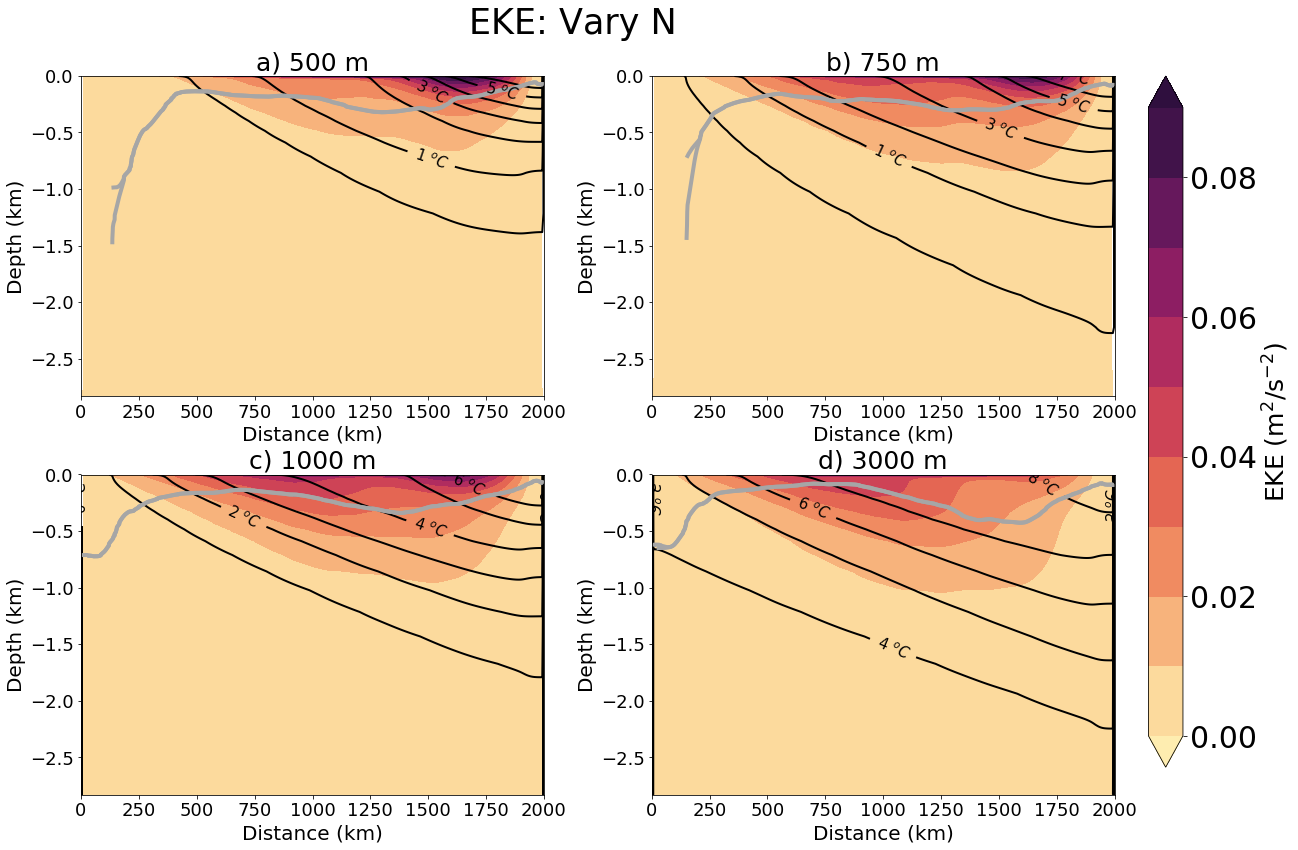

In [103]:
Psi_levs = np.arange(-0., .10, .010)
Psi_ticks = np.arange(-0., .10, .02)
Q_levs = np.arange(-1., 8., 1),np.arange(-1., 8., 1),np.arange(-0., 8., 1),np.arange(-0., 10., 1)
fig = plt.figure(figsize=(16.0, 12.))
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'m/'
    c = utils.ChannelSetup(output_dir=str(fname))
    ax = fig.add_subplot(2, 2, i+1)
    EKE = c.calc_EKE()
    EKE[-1,:] = 0
    p = ax.contourf(c.yc/1000, c.zc/1000,
                EKE, Psi_levs, cmap=cmocean.cm.matter, extend='both')
    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q_levs[i], colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=15)
    # Plot mixed layer depth via layer probability
    g = layers_calc.LayersComputer(c)
    PI = c.mnc('PSI.nc', "LaPs1TH").mean(axis=2)
    th = c.mnc('PSI.nc', "LaHs1TH").mean(axis=2)
    PIz = g.transform_g_to_z(PI, th)
    # Remove some nonsense
    PIz[-5::, 50::] = np.nan
    P = 0.99999
    r = ax.contour(c.yg/1000, c.zc/1000, PIz[:,:], [P],
                   colors='0.75', linewidths=3)
    # Extract the contour data 
    dat0 = r.allsegs[0][0]
    
    # Plot nice thick smoothed line!
    s = ax.plot(dat0[15:-10,0],SG.savitzky_golay(dat0[15:-10,1],27,1),color='0.65', linewidth=4)
    # Remove the messy countour
    ax.collections.pop(-1)
    # Plot nice thick smoothed line!
    s = ax.plot(dat0[10:-10,0],SG.savitzky_golay(dat0[10:-10,1],27,1),color='0.65', linewidth=4)
     # Remove the messy countour
    ax.collections.pop(-1)
    ax.set_xlim(0,2000)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+' m', fontsize=25)
   
    ax.set_xlabel('Distance (km)', fontsize=20)
    ax.set_ylabel(r'Depth (km)', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=18)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax, ticks=Psi_ticks)
cbar.ax.tick_params(labelsize=30)
cbar.ax.set_ylabel(r'EKE (m$^2$/s$^{-2}$)', fontsize=25, )

fig.suptitle('EKE: Vary N',fontsize=35)
fig.subplots_adjust(top=0.9)

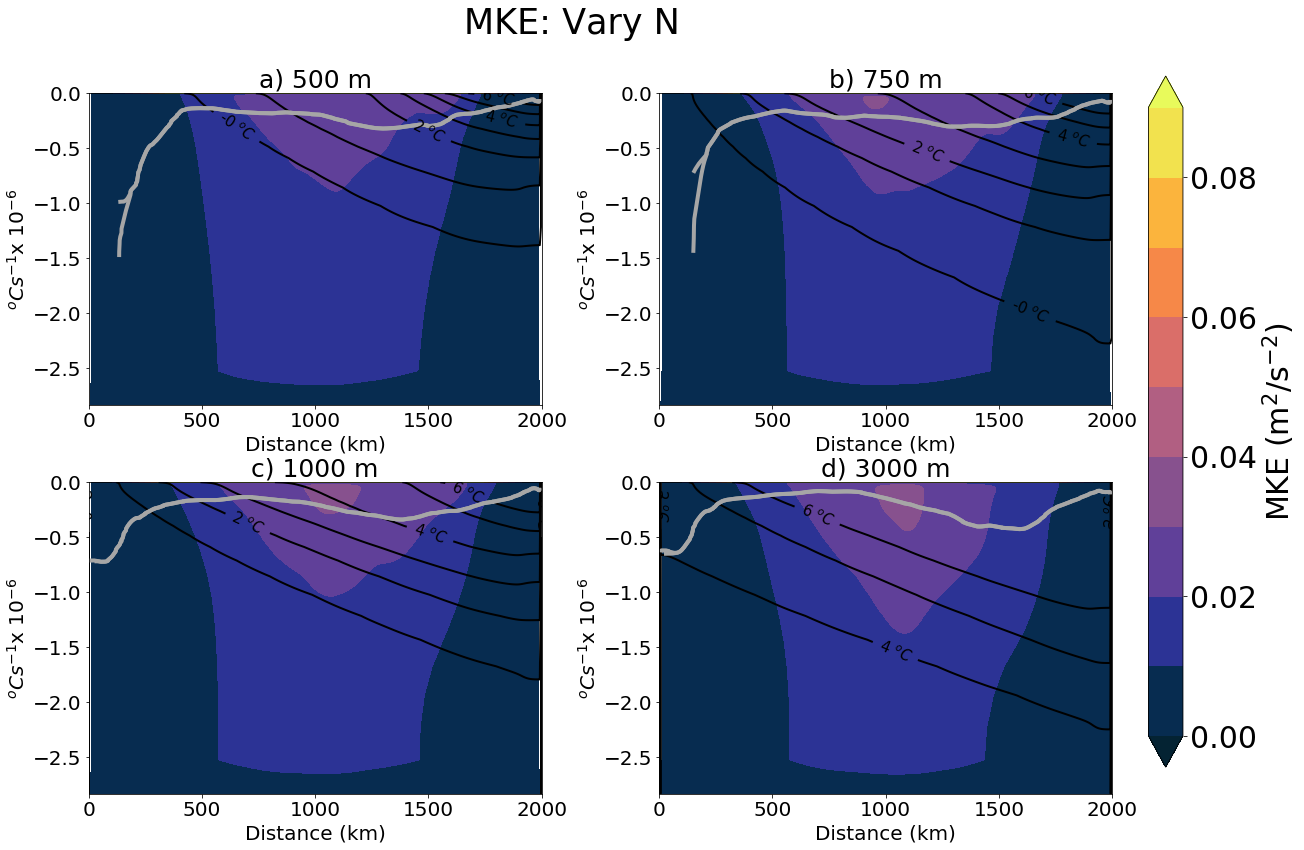

In [32]:
Psi_levs = np.arange(-0., .10, .010)
Psi_ticks = np.arange(-0., .10, .02)
Q_levs = np.arange(-0., 8., 1)
fig = plt.figure(figsize=(16.0, 12.))

for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'m/'
    c = utils.ChannelSetup(output_dir=str(fname))
    ax = fig.add_subplot(2, 2, i+1)
    EKE = c.calc_MKE()
    EKE[-1,:] = 0
    p = ax.contourf(c.yc/1000, c.zc/1000,
                EKE, Psi_levs, cmap=cmocean.cm.thermal, extend='both')
    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=15)
    # Plot mixed layer depth via layer probability
    g = layers_calc.LayersComputer(c)
    PI = c.mnc('PSI.nc', "LaPs1TH").mean(axis=2)
    th = c.mnc('PSI.nc', "LaHs1TH").mean(axis=2)
    PIz = g.transform_g_to_z(PI, th)
    # Remove some nonsense
    PIz[-5::, 50::] = np.nan
    P = 0.99999
    r = ax.contour(c.yg/1000, c.zc/1000, PIz[:,:], [P],
                   colors='0.75', linewidths=3)
    # Extract the contour data 
    dat0 = r.allsegs[0][0]
   
    # Plot nice thick smoothed line!
    s = ax.plot(dat0[15:-10,0],SG.savitzky_golay(dat0[15:-10,1],27,1),color='0.65', linewidth=4)
    # Remove the messy countour
    ax.collections.pop(-1)
    # Plot nice thick smoothed line!
    s = ax.plot(dat0[10:-10,0],SG.savitzky_golay(dat0[10:-10,1],27,1),color='0.65', linewidth=4)
     # Remove the messy countour
    ax.collections.pop(-1)
    ax.set_xlim(0,2000)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+' m', fontsize=25)
    ax.set_xlabel('Distance (km)', fontsize=20)
    ax.set_ylabel(r'$^oCs^{-1}$x $10^{-6}$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax, ticks=Psi_ticks)
cbar.ax.tick_params(labelsize=30)
cbar.ax.set_ylabel(r'MKE (m$^2$/s$^{-2}$)', fontsize=30, )

fig.suptitle('MKE: Vary N',fontsize=35)
fig.subplots_adjust(top=0.88)

In [ ]:
Psi_levs = np.arange(-0., .10, .010)
Psi_ticks = np.arange(-0., .10, .02)
Q_levs = np.arange(-0., 8., 1)
fig = plt.figure(figsize=(16.0, 12.))
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'m/'

    c = utils.ChannelSetup(output_dir=str(fname))
    ax = fig.add_subplot(2, 2, i+1)

    Tpsq =(c.mnc('VSQT.nc','THETASQ', mask=c.HFacC[:]) - c.mnc('TavT.nc','THETA',
                                                      mask=c.HFacC[:])**2)*CellVol
   
    T = c.mnc('TavT.nc','THETA')
    Tz = c.ddz_cgrid_centered(T)
    Tstar  = c.mnc('TavT.nc','THETA').mean(axis=2).mean(axis=1)
    Tstar = np.tile(Tstar,(c.Nx,c.Ny,1)).T
    T  = c.mnc('TavT.nc','THETA')
    g = -9.81  
    EPE = g * (Tz/T)*Tpsq*c.ddz_cgrid_centered(Tstar)
    
    EPE = np.cumsum((EPE).mean(axis=2)[::-1],axis=0)[::-1]
    EPE[-1,:] = 0
    if i==0:
        zl = 30
        scale = 1
    else:
        zl = 30
        scale = 0.5
    
    p = ax.contourf(c.yc/1000, c.zc[0:zl]/1000,
                    -(EPE[0:zl]/30)*1000, Psi_levs*scale, cmap=cmocean.cm.thermal, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=15)
    # Plot mixed layer depth via layer probability
    g = layers_calc.LayersComputer(c)
    PI = c.mnc('PSI.nc', "LaPs1TH").mean(axis=2)
    th = c.mnc('PSI.nc', "LaHs1TH").mean(axis=2)
    PIz = g.transform_g_to_z(PI, th)
    # Remove some nonsense
    PIz[-5::, 50::] = np.nan
    P = 0.99999
    r = ax.contour(c.yg/1000, c.zc/1000, PIz[:,:], [P],
                   colors='0.75', linewidths=3)
    # Extract the contour data 
    dat0 = r.allsegs[0][0]
    if i==1:
        ax.collections.pop(-1)
        P = 0.999999
        r = ax.contour(c.yg/1000, c.zc/1000, PIz, [P],
                   colors='0.75', linewidths=3)
        dat0= r.allsegs[0][1]
    # Plot nice thick smoothed line!
    s = ax.plot(dat0[15:-10,0],SG.savitzky_golay(dat0[15:-10,1],27,1),color='0.65', linewidth=4)
    # Remove the messy countour
    ax.collections.pop(-1)
    # Plot nice thick smoothed line!
    s = ax.plot(dat0[10:-10,0],SG.savitzky_golay(dat0[10:-10,1],27,1),color='0.65', linewidth=4)
     # Remove the messy countour
    ax.collections.pop(-1)
    ax.set_xlim(0,2000)
    ax.set_title(str(Figletter[Runs[i]])+'No Q, '+str(tau[Runs[i]])+' day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+'No Q, '+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=20)
    ax.set_ylabel(r'$^oCs^{-1}$x $10^{-6}$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax, ticks=Psi_ticks)
cbar.ax.tick_params(labelsize=30)
cbar.ax.set_ylabel(r'EPE ', fontsize=30, )

fig.suptitle('EPE: No Q',fontsize=35)
fig.subplots_adjust(top=0.82)